In [1]:
%matplotlib inline
import warnings
import imp
import pickle
import lmfit
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

# Styling
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [2]:
# Initialise wrapper and test datasets
wrapper_fpath = (r'../mobius.py')
wr = imp.load_source('mobius', wrapper_fpath)
wr.initialize('../../Applications/SimplyCNP/simplycnp.dll')   # .so on Linux

# Calibration and uncertainty functions
calib_fpath = (r'../mobius_calib_uncert_lmfit.py')
cu = imp.load_source('mobius_calib_uncert_lmfit', calib_fpath)

In [3]:
# Load dataset
dataset = wr.DataSet.setup_from_parameter_and_input_files('../../Applications/SimplyCNP/Tarland/TarlandParameters.dat',
                                                          '../../Applications/SimplyCNP/Tarland/TarlandInputs.dat')

In [4]:
# List of simulated and observed variables to investigate for Tarland
comparisons = [
               ('Reach flow (daily mean, cumecs)', ['Coull'], 'observed Q', []),
               ('Reach DIN concentration (volume weighted daily mean)', ['Coull'], 'observed NO3', []),
               ('Reach suspended sediment concentration', ['Coull'], 'observed SS', []),
               ('Reach TDP concentration', ['Coull'], 'observed TDP', []),
               ('Reach PP concentration', ['Coull'], 'observed PP', []),
               ('Reach DOC concentration (volume weighted daily mean)', ['Coull'], 'observed DOC', []),
              ]


Goodness of fit for Reach flow (daily mean, cumecs) [Coull] vs observed Q []:
Mean error (bias): 0.027253
Mean absolute error: 0.135134
Root mean square error: 0.195607
Nash-Sutcliffe coefficient: 0.743774
Number of observations: 480


Goodness of fit for Reach DIN concentration (volume weighted daily mean) [Coull] vs observed NO3 []:
Mean error (bias): -0.001047
Mean absolute error: 0.374237
Root mean square error: 0.474050
Nash-Sutcliffe coefficient: 0.282740
Number of observations: 399


Goodness of fit for Reach suspended sediment concentration [Coull] vs observed SS []:
Mean error (bias): 1.053742
Mean absolute error: 10.846723
Root mean square error: 31.369973
Nash-Sutcliffe coefficient: 0.153534
Number of observations: 398


Goodness of fit for Reach TDP concentration [Coull] vs observed TDP []:
Mean error (bias): 0.000047
Mean absolute error: 0.007454
Root mean square error: 0.010480
Nash-Sutcliffe coefficient: 0.211546
Number of observations: 399


Goodness of fit for Reach P

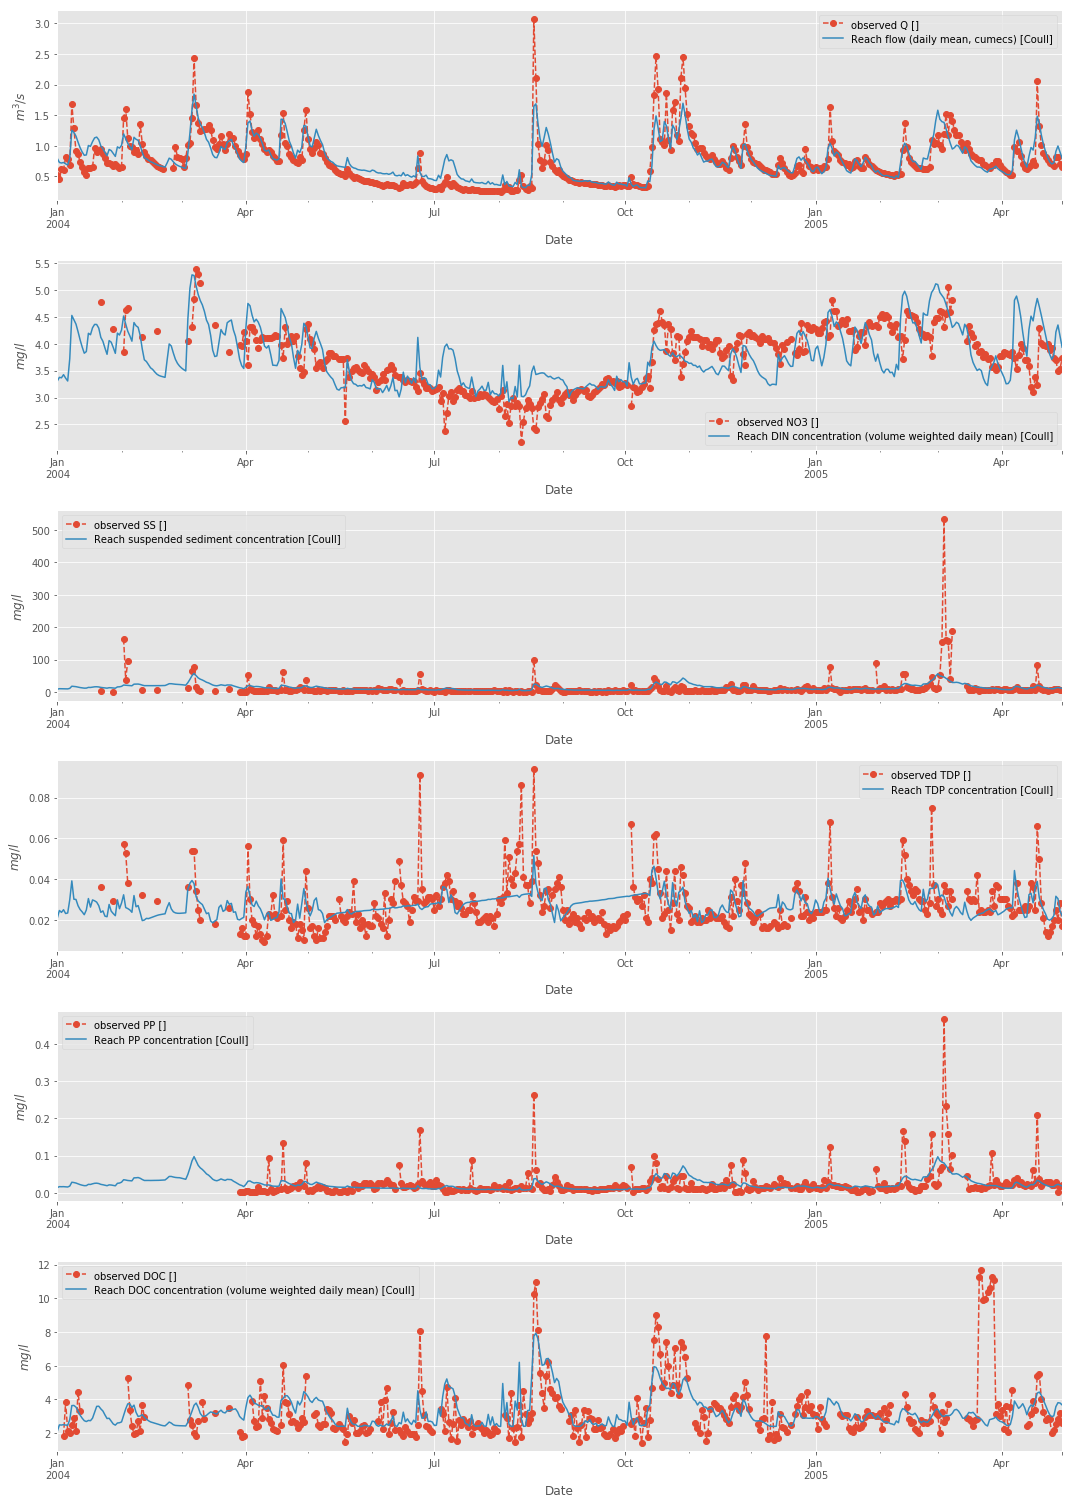

In [5]:
# Plot results from manual calibration
dataset.run_model()
cu.print_goodness_of_fit(dataset, comparisons)
cu.plot_objective(dataset, comparisons)

In [6]:
# Define abbreviations for indexes, to use in generation of parameter short names
#index_short_name = {'Agricultural':'A', 'Seminatural':'SN', 'Coull':'r'}
index_short_name = {'Arable':'A', 'Semi-natural':'SN', 'Improved grassland':'IG', 'Coull':'r'}

pd.set_option('display.max_rows', 10000) # So that it prints all the rows
# Get parameter values defined in 'dataset'
param_df = cu.get_double_parameters_as_dataframe(dataset, index_short_name=index_short_name)
param_df

,name,short_name,unit,index,min_value,initial_value,max_value
0,Degree-day evapotranspiration,DDET_A,mm/°C/day,"(Arable,)",0.05000,0.180000,2.000000e-01
1,Degree-day evapotranspiration,DDET_IG,mm/°C/day,"(Improved grassland,)",0.05000,0.180000,2.000000e-01
2,Degree-day evapotranspiration,DDET_SN,mm/°C/day,"(Semi-natural,)",0.05000,0.180000,2.000000e-01
3,Minimal temperature for evapotranspiration,ETPtmin_A,°C,"(Arable,)",-5.00000,0.000000,5.000000e+00
4,Minimal temperature for evapotranspiration,ETPtmin_IG,°C,"(Improved grassland,)",-5.00000,0.000000,5.000000e+00
5,Minimal temperature for evapotranspiration,ETPtmin_SN,°C,"(Semi-natural,)",-5.00000,0.000000,5.000000e+00
6,Initial snow depth as water equivalent,,mm,(),0.00000,0.000000,5.000000e+04
7,Degree-day factor for snowmelt,DDFmelt,mm/°C/day,(),0.00000,2.920000,5.000000e+00
8,Proportion of precipitation that contributes t...,fquick,dimensionless,(),0.00000,0.020000,1.000000e+00
9,Soil field capacity,fc,mm,(),0.00000,290.000000,1.000000e+03


In [7]:

wanted_names = [
    'DDET', 'DDFmelt', 'fquick', 'fc', 'bfi', 'Tg', 'Ts', 'STC',
    'fc', 'den', 'Q10den', 'imms', 'Q10imms', 'DINgw',
    'ksed', 'TDPsw_A', 'TDPgw', 'EPP', 'TDPeff',
    'kT', 'baseDOC', 'DOCgw',
]

#The following code selects any parameter with short_name *beginning* with any of the strings in the 'wanted_names' list.
#This means e.g. that if you replace 'Ts_SN' with 'Ts' in the above list, it will select all the parameters
#starting with Ts, i.e. all the soil water time constants.
calib_df = param_df[[any([sn.startswith(n) for n in wanted_names]) for sn in param_df['short_name']]].reset_index(drop=True)
params = cu.parameter_df_to_lmfit(calib_df)

params

name,value,initial value,min,max,vary
DDET_A,0.18000000,0.18000000000000002,0.05000000,0.20000000,True
DDET_IG,0.18000000,0.18000000000000002,0.05000000,0.20000000,True
DDET_SN,0.18000000,0.18000000000000002,0.05000000,0.20000000,True
DDFmelt,2.92000000,2.92,0.00000000,5.00000000,True
fquick,0.02000000,0.020000000000000004,0.00000000,1.00000000,True
fc,290.000000,290.0,0.00000000,1000.00000,True
bfi,0.70000000,0.7000000000000001,0.00000000,1.00000000,True
Tg,104.000000,104.0,0.50000000,400.000000,True
Ts_A,3.00000000,3.0,0.01000000,40.0000000,True
Ts_IG,3.00000000,3.0,0.01000000,40.0000000,True


In [8]:
#Reduce complexity by locking some parameters across landscape units
params['DDET_A'].set(expr='DDET_SN')
params['DDET_IG'].set(expr='DDET_SN')
params['Ts_A'].set(expr='Ts_IG')
params['STC_A'].set(expr='STC_SN')
params['STC_IG'].set(expr='STC_SN')

In [ ]:
%%time
# Minimise using Levenberg–Marquardt (gives similar output to Nelder-Mead, 
# but in this case it's faster)
mi, res = cu.minimize_residuals(params, dataset, comparisons, method='nelder', norm=True, 
                                skip_timesteps=0)

print('Optimisation results:\n')
lmfit.report_fit(res)
print('\n\nOptimised parameter values:\n')
res.params.pretty_print(precision=3)

In [ ]:
# Plot results from optimisation
cu.set_parameter_values(res.params, dataset)
dataset.run_model()
cu.print_goodness_of_fit(dataset, comparisons)
cu.plot_objective(dataset, comparisons)